In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("D:/credit-scoring-model/data/features.csv")
y = pd.read_csv("D:/credit-scoring-model/data/target.csv")

In [4]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [17]:
# scripts/train_model.py

# Replace right after loading the dataset
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
    'employment', 'installment_rate', 'personal_status_sex', 'other_debtors',
    'present_residence', 'property', 'age', 'other_installment_plans', 'housing',
    'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'
]

X.columns = column_names


In [18]:
print(X.columns.tolist())


['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']


In [5]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [6]:
df = X.copy()
df['creditworthy'] = y

In [7]:
print(df.describe())
print(df['creditworthy'].value_counts())

        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18  creditworthy  
count  1000.000000  1000.000000   1000.000000  
mean      1.407000     1.155000      1.300000  
std       0.577654     0.362086      0.458487  
min       1.000000     1.000000      1.000000  
25%       1.000000     1.000000      1.000000  
50%       1.000000     1.000000     

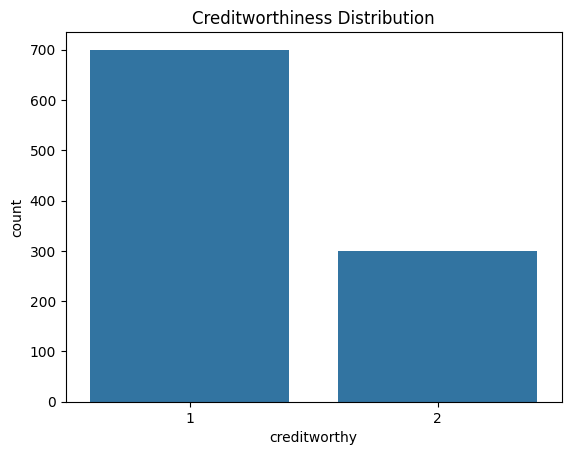

In [8]:
sns.countplot(x='creditworthy', data=df)
plt.title("Creditworthiness Distribution")
plt.show()

In [11]:
numeric_df = df.select_dtypes(include=['number'])

In [12]:
print(df.dtypes)


Attribute1      object
Attribute2       int64
Attribute3      object
Attribute4      object
Attribute5       int64
Attribute6      object
Attribute7      object
Attribute8       int64
Attribute9      object
Attribute10     object
Attribute11      int64
Attribute12     object
Attribute13      int64
Attribute14     object
Attribute15     object
Attribute16      int64
Attribute17     object
Attribute18      int64
Attribute19     object
Attribute20     object
creditworthy     int64
dtype: object


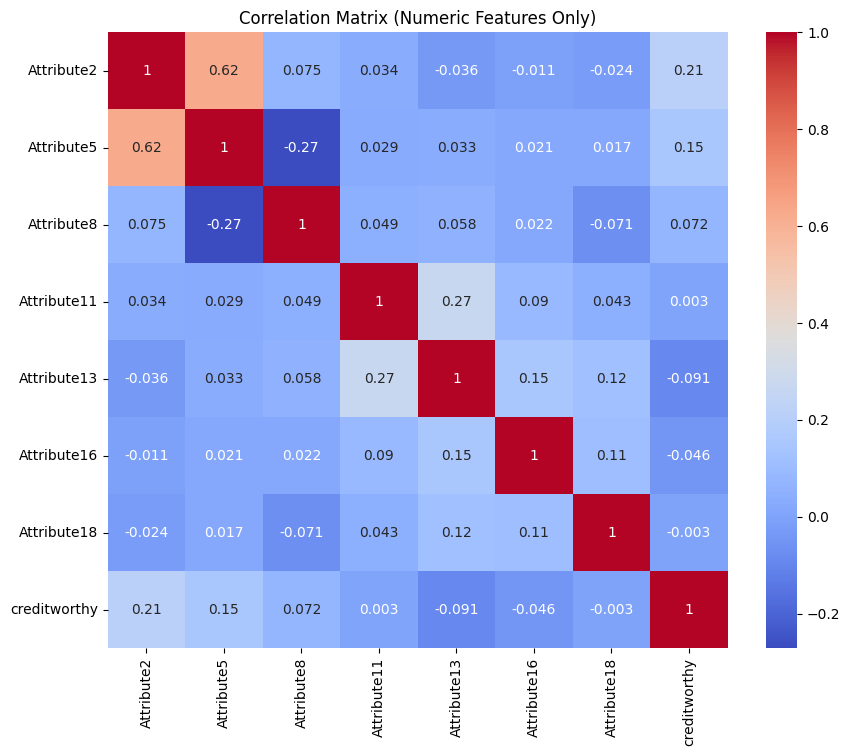

In [15]:

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()